In [1]:
! pip install pandoc 

You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
g.request("search", {'q': 'Himanshu Gupta', 'type': 'user'})

{'data': []}

In [97]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')
import itertools
import csv


# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)


In [3]:
!pip install facebook-sdk

You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [23]:
ACCESS_TOKEN = 'EAACEdEose0cBANaiIrpS5J1vP8ibtfdvWZCB9ZC3ecqDZBEqB7GhZCgTJyiong01A3zo7fpAyfM8trg2baV6NKMvEI01XoHwyt9E0FDXSnEk4ZCCUyUURQciPkDiM6qKAB8TsZA7l0ZBdvnHU5ZChj7EUXn9TfEdd5iRiZB5s6h4gaS0REZCgddVn3sY5ZBe4XDVAaojRSnZAlh1cy91Lsl5Nxv0qbil6SxLooZCVvV3NqxGCvQZDZD'

In [19]:
!pip install facebook

  Could not find a version that satisfies the requirement facebook (from versions: )
No matching distribution found for facebook
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:

import facebook # pip install facebook-sdk

# Valid API versions are '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7'

# Create a connection to the Graph API with your access token
g = facebook.GraphAPI(ACCESS_TOKEN, version='2.7')

In [25]:
#List of Artists:
voice = ['Beatles','Bob Dylan','The Rolling Stones','Elvis Presley','Nirvana','Bruce Springsteen','Van Morrison',
         'Michael Jackson', 'Chuck Berry', 'Robert Johnson', 'John Lennon', 'Stevie Wonder','James Brown','Fleetwood Mac','U2',
         'Led Zeppelin','Joni Mitchell','Ramones','The Band','David Bowie','Carole King','Eagles','Muddy Waters','Love',
         'Sex Pistols','The Doors', 'Pink Floyd','Patti Smith','Bob Marley ', 'John Coltrane']


In [106]:
#Create Dataframe for artist
artist_names = pd.DataFrame({"artist_names": voice, "artist_id" : range(len(voice))})

In [72]:
# Create Artist CSV
artist_names.to_csv("artist.csv", index= False) 

In [27]:
#Official Artist Fan Pages id:
fan_page_artist = []
# for i in range(len(voice)):
g.request("search", {'q': voice[0], 'type': 'page'})['data']

[]

In [968]:
# Data Frame : fan page~ fbids
fan_art_id = pd.DataFrame({"fan_pg_id": range(len(fan_page_artist)), "fan_pg_fbid": fan_page_artist})

In [880]:
# CSV Official Artist fan pages fbids
fan_art_id.to_csv("artist_fbid.csv", index= False)

In [1]:
#Fan page name
fan_page_nm =[]
for i in range(len(voice)):
    fan_page_nm.append((g.request("search", {'q': voice[i], 'type': 'page'}))['data'][0]['name'])
   

In [1381]:
#Fan Page {name,fbid, index}
fan_page = pd.DataFrame({"artist_id": range(len(fan_page_artist)), "fan_pg_fbid": fan_page_artist,"art_nm": fan_page_nm , "artist_names": voice})

In [1382]:
#Csv Fan {names, fbid, index}
fan_page.to_csv("fan_page.csv", index= False)

In [587]:
# Fan count function:
def fan_count(page_id):
    return int(g.get_object(id=page_id, fields=['fan_count'])['fan_count'])

In [588]:
#Fan C0Ount for Artist fan pages:
fan_pg_count = []
for i in range(len(fan_page_artist)):
    fan_pg_count.append(fan_count(fan_page_artist[i]))

In [970]:
#Data Frame Fan Page count:
fan_pg_ct = pd.DataFrame({"fan_pg_fbid": fan_page_artist,"fn_ct": fan_pg_count, ""} )

In [590]:
#CSV fan page
fan_pg_ct.to_csv("fan_ct.csv")

In [591]:
# Extracting Artist fan post for from oficial fan pages: 
artist_fan_post= []
for i in range(len(fan_page_artist)):
    artist_fan_post.append(g.get_connections(fan_page_artist[i],'posts' )['data'])


In [898]:
#Creating List of every post from all atist fan pages
artist_post_lis = []
k=0
for i in range(len(fan_page_artist)):
    for j in range(len(artist_fan_post[i])):
        artist_post_lis.append(artist_fan_post[i][j])
        k=k+1

In [2]:
#Creating list for every element in post i.e  message, created_time, id
column_names = ['message', 'created_time', 'id']
lis_message = []
lis_created_time = []
lis_id = []
for i in range(len(artist_post_lis)):
    
    if 'message' in artist_post_lis[i]:
        lis_message.append(artist_post_lis[i]['message'])
       
    else:
         lis_message.append('None') 
        
    if 'created_time' in artist_post_lis[i]:
        lis_created_time.append(artist_post_lis[i]['created_time'])
        
    
    else:
        lis_created_time.append('None') 
       
   
    if 'id' in artist_post_lis[i]:
        lis_id.append(artist_post_lis[i]['id'])
    
    else:
        lis_id.append('None') 

In [92]:
#Creating dataframe Artist Fan Pages and post:
import pandas as pd
xfart = pd.DataFrame({'message': lis_message, 'created_id' : lis_created_time, 'post_id': lis_id})


In [62]:
page_id=[]
for i in fan_page_artist:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            page_id.append(i)
            flag=flag+1       

In [ ]:
page_id=[]
for i in fan_page_artist:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            page_id.append(i)
            flag=flag+1       

In [502]:
# Influence Table{post_id, rel_eng}
artist_infl = pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/post_eng.csv", index_col=  False, header= 0,  encoding = "ISO-8859-1")

In [501]:
artist_nms =[]
for k in voice:
    flag=0
    print(k)
    for row in xfart.iterrows():
        if(flag<25):
            print (row)
            artist_nms.append(k)
            flag=flag+1

In [4]:
# for row, i in xfart.iterrows():
#     print(row)
#     print(i)
xfart['artist_names'] = artist_nms
xfart['page_id'] = page_id
xfart

In [616]:
xfart.to_csv("artist_post.csv")

In [84]:
def post_engagement(post_id):
    likes = g.get_object(id=post_id, 
                         fields=['likes.limit(0).summary(true)'])\
                         ['likes']['summary']['total_count']
    try:
        shares = g.get_object(id=post_id, 
                            fields=['shares.limit(0).summary(true)'])\
                           ['shares']['count']
    except KeyError:
        shares = 0;
    comments = g.get_object(id=post_id, 
                         fields=['comments.limit(0).summary(true)'])\
                         ['comments']['summary']['total_count']
    return likes, shares, comments

In [91]:
#eng-post
s = []
for i in range(len(lis_id)):
    s.append(post_engagement(lis_id[i]))

In [86]:
eng_post = s

In [87]:
#List of likes,comments, Shares
likes = []
comments =[]
shares = []
for i in range(len(lis_id)):
    likes.append(s[i][0])
    comments.append(s[i][1])
    shares.append(s[i][2])


In [36]:
d = pd.DataFrame({"post_id": fan_pg_fbid  , "post_likes": lk, "post_comment": comnt, "shares" : shr})
page_id=[]
for i in fan_page_artist:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            page_id.append(i)
            flag=flag+1
d['page_id'] = page_id
d

In [45]:
post_id = xfart['fan_pg_id']


In [83]:
# d = pd.DataFrame({"post_id": post_id  , "post_likes": lk, "post_comment": comnt, "shares" : shr})
d= pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/post_eng_metric.csv", index_col=  False, header= 0,  encoding = "ISO-8859-1")

In [724]:
# function for Relativ engagement:
def relative_engagement(e, total_fans):
    a=[]
    for i in e:
        a.append(i/total_fans)
    return a

In [900]:
# Measure the relative share of a page's fans engaging with a post
re_eng= []
k = 0
for i in range(len(fan_pg_count)):
    flag=0
    for j in range(len(eng_post)):
        if(flag<25):
            re_eng.append(relative_engagement(eng_post[k],fan_pg_count[i])[1])
            flag= flag+1
            k=k+1         

In [1563]:
#Data Frame post enagement
artist_infl = pd.DataFrame({"post_id":lis_id, "rel_eng": re_eng })

In [732]:
#CSV re_eng
post_eng.to_csv("post_eng.csv")

In [ ]:
################################################################################################################################

In [2]:
#7 Tag Table
import pandas as pd
tags = ['Jazz', 'Rock', 'Pop', 'Blues', 'Folk', 'World', 'Country', 'Funk', 'Soul', 'Pop','Reggae', 'Electronic' ]  
tag_df = pd.DataFrame({'tags': tags})

# tag_df

In [3]:
#CSV Tags {tags}
tag_df.to_csv("tags.csv", index= False)

In [4]:
#1 Csv Read Artist {artist_id, artist_names}
import pandas
artist_names = pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/artist (1).csv", index_col=  False, header= 0)

In [5]:
#2Fan Pages Read(artist_names, fan_pg_fbid, artist_id, art_nm(official fan page name))
fan_page= pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/fan_page.csv", index_col=  False, header= 0)

In [368]:
#3 Read CSv Fan Page Count(fan_pg_fbid, fn_ct)
fan_pg_ct = pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/fan_ct.csv", index_col=  False, header= 0)

In [133]:
#4 Read CSv Artist_post(created_id, post_id, message, fan_pg_fbid)
xfart= pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/artist_post.csv", index_col=  False, header= 0,  encoding = "ISO-8859-1")


In [214]:
#5 Read Post Engagement
d= pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/post_eng_metric.csv", index_col=  False, header= 0,  encoding = "ISO-8859-1")


In [8]:
#6 Influence Table{post_id, rel_eng}
artist_infl = pandas.read_csv("C:/Users/Girijesh/Desktop/Project- DB/post_eng.csv", index_col=  False, header= 0,  encoding = "ISO-8859-1")


In [48]:
xfart['post_likes'] = d['post_likes']
xfart['post_comments'] = d['post_comments']
xfart['post_shares'] = d['post_shares']
xfart['relative_eng'] = artist_infl['rel_eng']

In [136]:
fan_count=[]
for i in fan_pg_ct["fn_ct"]:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            fan_count.append(i)
            flag=flag+1   

In [14]:
fan_pg_fbid1=[]
for i in fan_pg_ct["fan_pg_fbid"]:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            fan_pg_fbid1.append(i)
            flag=flag+1 

In [15]:
fan_pg_fbid1=[]
for i in fan_pg_ct["fan_pg_fbid"]:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            fan_pg_fbid1.append(i)
            flag=flag+1 

In [16]:
artist_names1=[]
for i in fan_page["artist_names"]:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            artist_names1.append(i)
            flag=flag+1 

In [17]:
artist_nm1=[]
for i in fan_page["art_nm"]:
    flag=0
    for j,row in xfart.iterrows():
        if(flag<25):
            artist_nm1.append(i)
            flag=flag+1 

In [20]:
tag_ct= []
for i in yy:
    flag=0
    for j in xfart.iterrows():
        if(flag<25):
            tag_ct.append(i)
            flag= flag+1

In [49]:
fan_c1 = pd.Series(fan_count)
fan_pg_fbid1 = pd.Series(fan_pg_fbid1)
artist_names1 = pd.Series(artist_names1)
artist_nm1 =pd.Series(artist_nm1)
tag_ct= pd.Series(tag_ct)
xfart['fan_count'] =fan_c1.values
xfart['fan_pg_fbid']= fan_pg_fbid1.values
xfart['artist_names1'] = artist_names1.values
xfart['artist_fan_page_nm'] = artist_nm1.values
xfart["tag_counts"] = tag_ct.values

# Ques7. Topics Trending in my domain

Explaination:
1.I used regular expression for all the tags used Artist wise and calculate the tags. 

In [310]:
# tags = ['Jazz', 'Rock', 'Pop', 'Blues', 'Folk', 'World', 'Country', 'Funk', 'Soul', 'Pop','Reggae', 'Electronic' ]  
# Tag counts
import re
word_regexs = [r'rock', r'country', r'jazz', r'pop', r'folk', r'world', r'funk', r'soul', r'reggae', r'beatles', r'rap', r'canadian']
xx= []
yy= []
for i in range(len(fan_pg_ct)):
    xx.append(artist_names['artist_names'][i])
    yy.append(pandas.Series((xfart.loc[xfart['fan_pg_fbid'] == fan_pg_ct['fan_pg_fbid'][i]].message.str.lower().str.contains(r, case= False).sum() for r in word_regexs), word_regexs, name='count'))
    

In [311]:
yy

[rock        0
 country     0
 jazz        0
 pop         0
 folk        0
 world       2
 funk        0
 soul        0
 reggae      0
 beatles     5
 rap         0
 canadian    0
 Name: count, dtype: int64, rock        0
 country     2
 jazz        1
 pop         0
 folk        1
 world       0
 funk        1
 soul        1
 reggae      0
 beatles     0
 rap         0
 canadian    0
 Name: count, dtype: int64, rock        0
 country     0
 jazz        0
 pop         0
 folk        0
 world       2
 funk        1
 soul        0
 reggae      0
 beatles     0
 rap         0
 canadian    0
 Name: count, dtype: int64, rock        3
 country     0
 jazz        0
 pop         0
 folk        0
 world       2
 funk        0
 soul        0
 reggae      0
 beatles     0
 rap         0
 canadian    0
 Name: count, dtype: int64, rock        1
 country     0
 jazz        0
 pop         4
 folk        0
 world       1
 funk        0
 soul        0
 reggae      0
 beatles     0
 rap         0
 canadi

# Ques2. Viral are my posts

Expalaination:
1.The Virality of the posts is being inferred as number of shares made on artist page. 
2.The number of shares for all posts are  clubbed and then are ordered in decreasing. 

In [463]:
import sqlite3
sqlite_file='n_artist.db7'
conn = sqlite3.connect(sqlite_file)
c=conn.cursor()

In [472]:
#
d.to_sql('post_eng_table', 
        con= conn,
        if_exists = 'replace',
        index= False)


In [499]:
c.execute('Select post_shares, page_id from post_eng_table Group by page_id ORDER BY post_shares DESC ')
pd.read_sql_query("""SELECT post_shares, page_id FROM post_eng_table GROUP BY page_id ORDER BY post_shares DESC""", conn).head(4)

,post_shares,page_id
0,43232,'Beatles'
1,873,'Joni Mitchell'
2,636,'Elvis Presley'
3,403,'U2'


# Ques3.	How	much	influence	to	my	posts have?

Explaination:
1The influence of the artist is being viewed with respect to relative engagement of post with fans of the page.
2.Further thr rel_eng is ordered in decreasing.

In [484]:
import sqlite3
sqlite_file='n_artist.db7'
conn = sqlite3.connect(sqlite_file)
c=conn.cursor()

In [496]:
xfart.to_sql('fan_post_table', 
            con= conn, 
            if_exists = 'replace', 
            index= False)

In [492]:
xfart['rel_eng']= artist_infl['rel_eng']

In [494]:
xfart['artist_names'] = artist_infl['artist_names']

In [498]:
c.execute("Select rel_eng, artist_names from fan_post_table GROUP BY artist_names ORDER BY rel_eng DESC ")
pd.read_sql_query("""Select rel_eng, artist_names from fan_post_table GROUP BY artist_names ORDER BY rel_eng DESC""", conn).head(5)

,rel_eng,artist_names
0,0.001437,Bob Marley
1,0.001400,Carole King
2,0.000388,Joni Mitchell
3,0.000303,The Band
4,0.000272,Elvis Presley


# Ques12 Whats my Reach?

Explaination:
1.I have defined reach by the number of fans for each page. 
2.Then I have order in Decreasing count of fans count.

In [106]:
fan_pg_ct.to_sql('fan_count_table', 
            con= conn, 
            if_exists = 'replace', 
            index= False)

C:\Users\Girijesh\Anaconda3\lib\site-packages\pandas\core\generic.py:1345: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [109]:
c.execute("Select fn_ct, artist_names from fan_count_table as x JOIN fan_pages_table as y WHERE x.fan_pg_fbid= y.fan_pg_fbid ORDER BY fn_ct DESC ")
pd.read_sql_query("""Select fn_ct, artist_names from fan_count_table as x JOIN fan_pages_table as y WHERE x.fan_pg_fbid = y.fan_pg_fbid ORDER BY fn_ct DESC""", conn).head(5)

,fn_ct,artist_names
0,73994488,Michael Jackson
1,41424634,Beatles
2,29006435,Pink Floyd
3,27474321,Nirvana
4,19842266,The Rolling Stones


# Ques11 : Should I add url to my post 

Explaination:

1.For getting I used the regular expressions. 
2.I identified the number of urls each post possessed. 
3.The posts are grouped further based on the number of urls attached on the post. We identified 0 to 8. 
4.This was further plotted to understande the sense of urls used in the psot.

In [154]:
urls= []
for message in xfart.loc[:, 'message']:
    urls.append(re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', message))

In [150]:
import pandas as pd
urls_links = pd.DataFrame({'url': urls})

In [161]:
url_ct = []
for i in urls:
    url_ct.append(len(i))

In [170]:
urls_links['url_ct'] = url_ct
urls_links['post_likes'] = d['post_likes']

In [222]:
#url_based likes count over entire dataset
url_likes = urls_links.groupby('url_ct')['post_likes'].sum()

In [220]:
# urls_links.groupby('url_ct')['url_ct'].nuniqu
n_url  =  urls_links['url_ct'].value_counts()


In [229]:
#URL Rating
url_comp = pd.DataFrame({"url_likes": url_likes, "url_dis_cts": n_url})
url_comp['url_rating'] = url_comp['url_likes']/url_comp['url_dis_cts']

,url_dis_cts,url_likes,url_rating
0,383,1979758,5169.080940
1,295,1372511,4652.579661
2,51,171397,3360.725490
3,12,37419,3118.250000
4,5,23193,4638.600000
5,1,683,683.000000
7,1,623,623.000000
8,1,2469,2469.000000
9,1,1573,1573.000000


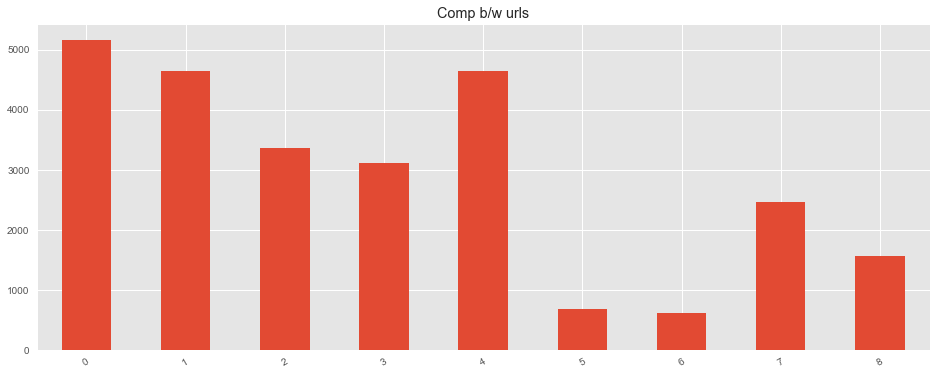

In [360]:
plt.style.use('ggplot')
plt.figure(figsize=(16,6))
list1=url_comp[ "url_rating"].plot.bar()
list1.set_xticklabels(list3.get_xticklabels(),rotation=30)
plt.title("Comp b/w urls")
sb.set_context(font_scale=1)
plt.show()

# Ques10) Best time to post

For this question I used xfart table which contains the created_id, post_likes, post_id, message etc. I used only two attributes
namely created_id for time series analysis and post_likes. I striped the hour from all the timestamp. Further I clubbed all the data based on the hour it was posted and cumulative likes was taken as measure to understand the used engagement of a post or best to post.Further it is shown through plot. The 15 hour is the time with maximum cumulative likes.

In [445]:
xfart[['created_id', 'time']] = xfart['created_id'].str.split('T', expand=True)

In [446]:
xfart['time'] = xfart['time'].apply(lambda x: x.split('+')[0])

In [447]:
xfart["time"] = pd.to_datetime(xfart["time"])

In [448]:
xfart["time_of_day"]=xfart["time"].dt.hour

In [450]:
xfart['post_likes'] = d['post_likes']

In [451]:

best_time = pd.DataFrame({'cum_likes':xfart.groupby('time_of_day')['post_likes'].sum()})

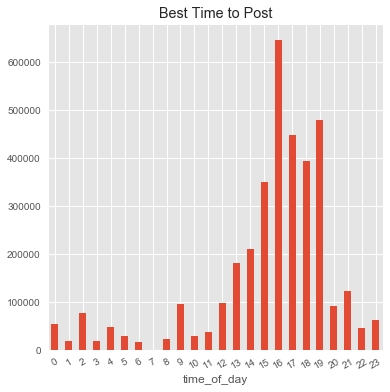

In [483]:
import seaborn as sb
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
list3=best_time["cum_likes"].plot.bar()
list3.set_xticklabels(list3.get_xticklabels(),rotation=30)
plt.title("Best Time to Post")
sb.set_context(font_scale=1)
plt.show()

# Ques9 Should I follow somebody back ?

For this question, 
1.I have taken fan count as parameter for artists to follow some other artists.
2.The fan counts are binned and the artist are clubbed together based on it.
3.The Gp refers to Gp assigned.

In [453]:
import numpy as np
bins1=[]
bins1.append(pd.cut(fan_pg_ct.fn_ct, np.arange(0, max(fan_pg_ct.fn_ct), max(fan_pg_ct.fn_ct)/10), labels= ['GP1', 'GP2', 'GP3', 'GP4', 'GP5', 'GP6', 'GP7', 'GP8', 'GP9']))

In [454]:
fan_pg_ct['fan_index']= bins1[0]

In [457]:
fan_pg_ct.groupby(['fan_index', 'artist_names'])['artist_names'].count()

fan_index  artist_names      
GP1        Bob Dylan             1
           Bob Marley            1
           Bruce Springsteen     1
           Carole King           1
           Chuck Berry           1
           David Bowie           1
           Eagles                1
           Fleetwood Mac         1
           James Brown           1
           John Coltrane         1
           Joni Mitchell         1
           Love                  1
           Muddy Waters          1
           Patti Smith           1
           Ramones               1
           Robert Johnson        1
           Sex Pistols           1
           Stevie Wonder         1
           The Band              1
           Van Morrison          1
GP2        Elvis Presley         1
           Led Zeppelin          1
GP3        John Lennon           1
           The Doors             1
           The Rolling Stones    1
           U2                    1
GP4        Nirvana               1
           Pink Floyd    

# Ques8)	What	keywords/	hashtags	should	I	add	to	my	post?

In [323]:
jazz= {0:'bebop', 1: 'blues,boogie',2: 'boogie-woogie', 3: 'bop,jazz', 4: 'dixieland'}
Rock={0:'folk', 1:'fusion',2:'hard rock',3:'harmony',4:'heavymetal'}
Pop= {0:'electropop', 1:'pop',2:'synthpop',3:'spain',4:'indie'}
Blues= {0:'zydeco', 1:'cajun',2:'bluesrock',3:'guitar',4:'classicrock'}
Reggae= {0:'reggaeton', 1:'reggae fusion',2:'samba reggae',3:'ragga',4:'dancehall'}
World= {0:'Worldbeat', 1:'ethno jazz',2:'Indigenous music',3:'New-age music,',4:'Post-punk',5:'',6:''}
Country= {0:'progressive country', 1:'Western swing',2:'close harmony',3:'bro-country',4:'Bakersfield sound'}
Funk = {0:'Deep funk', 1:'jazz-funk',2:'funk rock',3:'psychedelic funk',4:'G-funk'}
Soul= {0:'African-American culture', 1:'Musical improvisation',2:'Popular music',3:'Rhythm and blues',4:'doo-wop'}
Folk= {0:'indiefolk', 1:'acoustic',2:'Americana',3:'alternative',4:'psychedelic'}
Electronic= {0:'techno', 1:'electronica',2:'electro',3:'idm',4:'dubstep'}

In [325]:
jazz1 =list(jazz.values())
Rock1 = list(Rock.values())
Pop1 = list(Pop.values())
Blues1 = list(Blues.values())
Reggae1 = list(Reggae.values())
World1= list(World.values())
Country1 = list(Country.values())
Funk1= list(Funk.values())
Soul1 = list(Soul.values())
Folk1= list(Folk.values())
Electronic1 = list(Electronic.values())

In [435]:
from collections import Counter

def count_many(jazz1, xfart["message"]):
    count = Counter(xfart["message"].split())
    return {key: count[key] for key in count if key in jazz1}

# Ques6)	Who	should	I	be	following?

Explaination:
1.The fan counts for the artist are arranged in descending order. 
2.The artist will follow the artist with maximum fan count as it will enhance the visibility with larger audiences.

In [503]:
fan_pg_ct1 = fan_pg_ct.sort_values(['fn_ct'], ascending=False)

In [504]:
fan_pg_ct1['artist_names'] = artist_names['artist_names']

In [505]:
fan_pg_ct.artist_to_follow = np.nan

In [506]:
temp =[]
xx=[]
y=1
for i in range(len(fan_pg_ct)):
        if(fan_pg_ct1.fn_ct[i]<fan_pg_ct1.fn_ct[0: i].max()):
            xx.append(fan_pg_ct1.fn_ct[0:i].max())
            y=y+1

In [513]:
del fan_pg_ct1["fan_index"]

In [516]:
fan_pg_ct1

,Unnamed: 0,fan_pg_fbid,fn_ct,artist_names,artist_to_follow
7,7,1.969168e+10,73994488,Michael Jackson,NaN
0,0,6.911633e+10,41424634,Beatles,GP6
26,26,5.660597e+09,29006435,Pink Floyd,GP4
4,4,4.943632e+10,27474321,Nirvana,GP4
2,2,8.305888e+09,19842266,The Rolling Stones,GP3
14,14,5.678047e+09,17386691,U2,GP3
25,25,8.606723e+09,16742373,The Doors,GP3
10,10,1.353890e+14,15456066,John Lennon,GP3
15,15,1.315720e+14,13584091,Led Zeppelin,GP2
3,3,7.284979e+09,13375529,Elvis Presley,GP2


# Ques5).	What	users	post like	me?

Explaination:
1.For this question the rel eng index i.e the number of shares per fan counts of that page ,is being takenas paramter.
2.The posts similarity are seen with the view of engagement of fans with the post.
3.The mean of rel_engagement is calculated.
3.The mean of rel_eng are bined to see the similarity of posts.

In [29]:
# artist_infl
jj= []
for i in artist_names['artist_names']:
    flag=0
    for j in range(len(d)):
        if(flag<25):
            jj.append(i)
            flag=flag+1

In [32]:
artist_infl['artist_names'] = jj

In [43]:
mean_rel = list(artist_infl.groupby('artist_names')['rel_eng'].mean()*100)

In [44]:
artist_names['mean_rel'] = mean_rel

In [91]:
df = artist_names.sort_values(['mean_rel'], ascending=False)

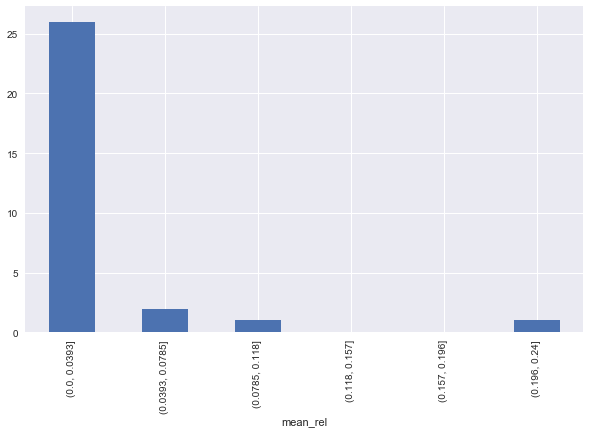

In [102]:
bins = [0.0,  0.039272,  0.078544,  0.117816,  0.157088,  0.19636 ,0.24]
df1 = df.groupby(pd.cut(df['mean_rel'], bins=bins, labels= )).mean_rel.count()
df1.plot(kind='bar')

# Ques 4.	What	posts are	like	mine?

Explaination: For this question:
1.The post ratings are by weighted with respect to likes, comments, shares attributes of posts. 
2.Weights: Likes: 0.2 (as it is a soft paramter), comments 0.3 (better eng index than likes), shares: 0.5(highest as it demonstrates likability of the post) ) 
3.Post Ratings are binned together and artists are clubbed to show the similarity of posts within artist.

In [306]:
d['post_ratings'] = d.post_likes*0.2 + d.post_comments*0.3 + d.post_shares*0.5


In [248]:
gg =[][]
for i in artist_names.artist_names:
    flag=0
    for j in range(len(artist_names)):
        if(flag<25):
            gg.append(i)
            flag= flag+1

In [258]:
tt=[]
for i in range(0,25):
    tt.append(d.loc[d['artist_names']== artist_names['artist_names'][i], "post_ratings"])

In [270]:
bins =[]
bins.append(pd.cut(d.post_ratings, np.arange(0,max(d.post_ratings), max(d.post_ratings)/750)))

In [280]:
d['ratings_bins'] = bins[0]

In [305]:
d.groupby(['ratings_bins', 'artist_names'])['artist_names'].count()

ratings_bins            artist_names     
(0.0, 62.124]           Bob Marley           25
                        Carole King           2
                        Chuck Berry           3
                        Eagles                5
                        John Coltrane         1
                        Joni Mitchell         1
                        Love                 23
                        Muddy Waters         15
                        Patti Smith           1
                        Robert Johnson       25
                        Sex Pistols           9
                        The Band             20
                        The Doors             4
                        Van Morrison          4
(62.124, 124.247]       Beatles               1
                        Bob Dylan             1
                        Bruce Springsteen     1
                        Carole King           3
                        Chuck Berry           6
                        Eagles                

# Ques1	What	are	people	saying	about	me	(somebody)?	


Explaination:
1.I have taken a quantitative approach for guess the people saying about me
2.For this question, the comments are taken as parameter.
3.Further cumulative sum of comments are plotted for each artist.

In [123]:
ff = d.groupby('page_id').agg({'post_comments':'sum'}).reset_index().rename(columns={'post_comments':'aggr_comments'})

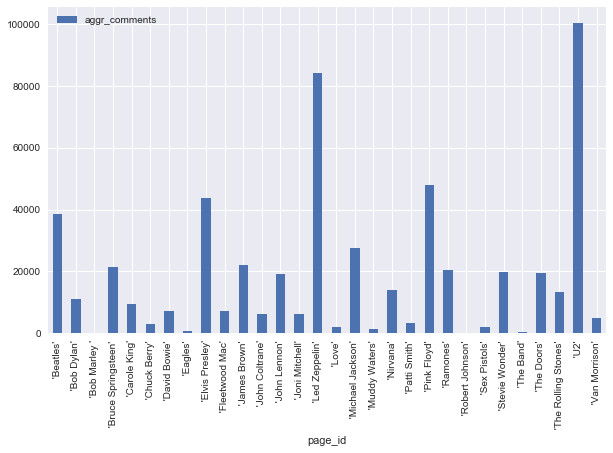

In [131]:
columns = ['aggr_comments', 'page_id']
ff = ff[columns]
ff.index=ff["page_id"]
ff.plot(kind='bar')